<a href="https://colab.research.google.com/github/maheshkumar30/Intellipaat-DataScience/blob/main/PurchaseCaseStudy06thJan2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Purchase Case Study**

**Dataset Link: https://drive.google.com/file/d/1dFrN2XbwR45E0OFPF5yh5cwZRLCUbmlC/view?usp=sharing**

**Importing Libraries**


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Configurational libraries**

In [ ]:
import warnings
warnings.filterwarnings('ignore') # It will ignore the warnings

**Load Data**

In [ ]:
df = pd.read_csv('/content/train.csv')

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


**Shape Analysis**

In [ ]:
a = df.shape
print(f'Rows: {a[0]} and columns: {a[1]}')

Rows: 550068 and columns: 12


**Columns Analysis**

In [ ]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


**Insight**
* We do have some null values
* We also have some object data tyoe

**Let's check all unique categories in age column**

In [ ]:
df['Age'].nunique()
# df.Age

7

In [ ]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

**Let's get the values counted for each Age category**

In [ ]:
df['Age'].value_counts()

,count
Age,
26-35,219587
36-45,110013
18-25,99660
46-50,45701
51-55,38501
55+,21504
0-17,15102


In [ ]:
var1 = lambda a,b: a+b
var1(5,6)

11

In [ ]:
(df['Age'].value_counts(normalize = True)*100).apply(lambda x: f'{x:.1f} %')

,proportion
Age,
26-35,39.9 %
36-45,20.0 %
18-25,18.1 %
46-50,8.3 %
51-55,7.0 %
55+,3.9 %
0-17,2.7 %


**Insight**
* Age group of 26-35 made more purchase
* 0-17 --> Least purchase

**Let's see the value count of Gender**

In [ ]:
(df['Gender'].value_counts(normalize = True)*100).apply(lambda x: f'{x:.2f} %')

,proportion
Gender,
M,75.31 %
F,24.69 %


**Insight**
* Majority of the purchase are made by Male

**Find the proportion for City Category**

In [ ]:
(df.City_Category.value_counts(normalize=True)*100).apply(lambda x: f'{x:.2f}')

,proportion
City_Category,
B,42.03
C,31.12
A,26.85


In [ ]:
(df.Stay_In_Current_City_Years.value_counts(normalize=True)*100).apply(lambda x: f'{x:.2f}')

,proportion
Stay_In_Current_City_Years,
1,35.24
2,18.51
3,17.32
4+,15.40
0,13.53


**We can replace the value 4+ with 4 (Because of 4+ the column is converted into Object)**

In [ ]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].replace('4+',4).astype(int) # Method Chaining

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  int64  
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 50.4+ MB


**Check the null values**

In [ ]:
df.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,173638


**I am having approx 5.5 lack+ data, and if we try to fill the null values with Central tendencies, My purchase amount can alter.**

**We can't replace the null value with zero, because 0 can be any product category number.**


In [ ]:
df.dropna(inplace = True)

In [ ]:
df.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,0


In [ ]:
a = df.shape
print(f'Rows: {a[0]} Columns: {a[1]}')

Rows: 166821 Columns: 12


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 166821 entries, 1 to 545914
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     166821 non-null  int64  
 1   Product_ID                  166821 non-null  object 
 2   Gender                      166821 non-null  object 
 3   Age                         166821 non-null  object 
 4   Occupation                  166821 non-null  int64  
 5   City_Category               166821 non-null  object 
 6   Stay_In_Current_City_Years  166821 non-null  int64  
 7   Marital_Status              166821 non-null  int64  
 8   Product_Category_1          166821 non-null  int64  
 9   Product_Category_2          166821 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    166821 non-null  int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 16.5+ MB


**Check duplicates**

In [ ]:
df.duplicated().sum()

np.int64(0)

**Visualization**

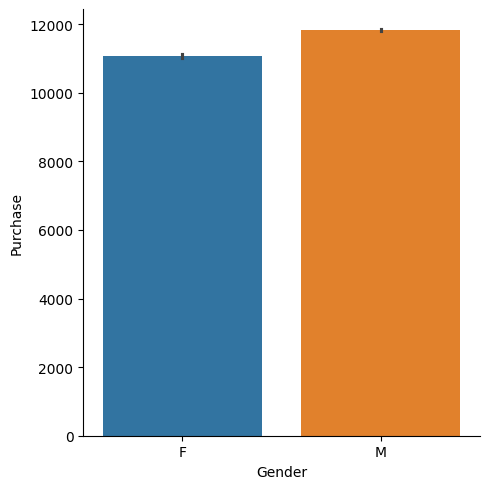

In [ ]:
sns.catplot(data = df, x = 'Gender', y='Purchase',kind = 'bar',hue = 'Gender')
plt.show()

**Insight**

* Male spend more money than female (Because we have more male data in our dataset)
* Even though we have more male data, but purchase marginally higher than female

In [ ]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

**Let's compare the distribution with respect to age and purchase**

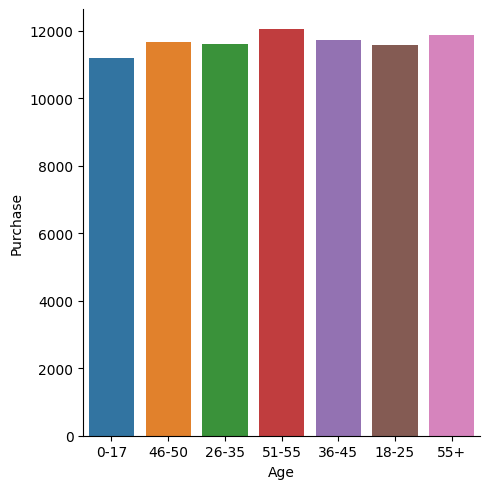

In [ ]:
sns.catplot(data = df, x='Age', y='Purchase', kind = 'bar', hue='Age',errorbar=('ci',False)) # Black line -> Error bar without ci false
plt.show()

**Insight**
* The age group 51-55 has more average purchase amount
* The age group 0-17 has less average purchase amount

**Let's see which product number sold the most**

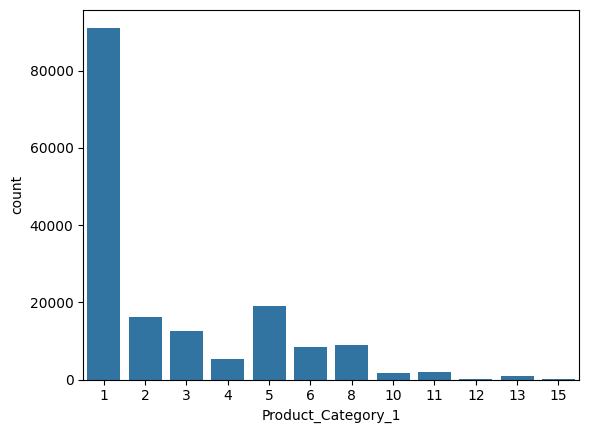

In [ ]:
sns.countplot(data = df, x = 'Product_Category_1')
plt.show()

**Distribution plot of purchase**

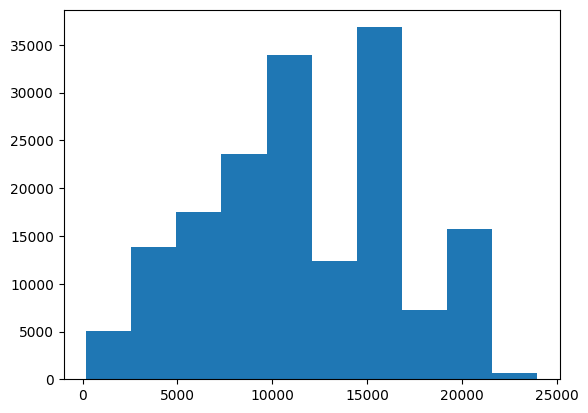

In [ ]:
plt.hist(df['Purchase'])
plt.show()

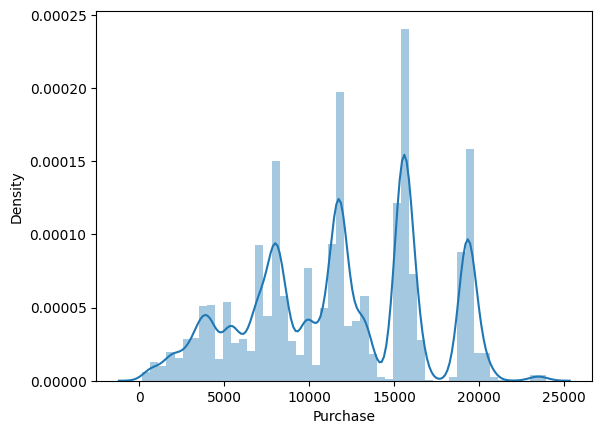

In [ ]:
sns.distplot(df['Purchase'])
plt.show()

**Skew of purchase**

In [ ]:
df['Purchase'].skew() # Slightly left skew

np.float64(-0.08458767367814019)

##**Encoding**
**It converts object data into numercal data**
1. **Lable Encoding**: Based on Alphabetical order it assigns the number
2. **Ordinal Encoding**: Based on provided order it assigns the number
3. **One-hot Encoding**: Each categories are going to get converted into columns and if category is present it will be 1 (True) else it will be 0 (False)

**Object columns**

In [ ]:
catCol = []
for i in df.columns:
  if df[i].dtype == object:
    catCol.append(i)
catCol

['Product_ID', 'Gender', 'Age', 'City_Category']

In [ ]:
# pip install sklearn ---> for ide's (scikit learn)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder() # I created an instance (Object) of class LabelEncoder

**Three Methods to understant Label Encoder**
* **fit()**: It is used to learn the data
* **transform()**: It will change the data into numeric
* **fit_transform()**: it combines the functionality of both fit and transform

In [ ]:
labelMap = {}

for x in catCol:
  df[x] = le.fit_transform(df[x])
  # Below this line of code are just for showing what categories is converted into what value
  labelMap[x] = dict(zip(le.classes_ , le.transform(le.classes_)))
  print(f'{x}: {labelMap[x]}')

Product_ID: {'P00000142': np.int64(0), 'P00000242': np.int64(1), 'P00000642': np.int64(2), 'P00001042': np.int64(3), 'P00001142': np.int64(4), 'P00001542': np.int64(5), 'P00002142': np.int64(6), 'P00002242': np.int64(7), 'P00003442': np.int64(8), 'P00004242': np.int64(9), 'P00004842': np.int64(10), 'P00005542': np.int64(11), 'P00005942': np.int64(12), 'P00006942': np.int64(13), 'P00008042': np.int64(14), 'P00010542': np.int64(15), 'P00010742': np.int64(16), 'P00010942': np.int64(17), 'P00011942': np.int64(18), 'P00012242': np.int64(19), 'P00014442': np.int64(20), 'P00014642': np.int64(21), 'P00014842': np.int64(22), 'P00015542': np.int64(23), 'P00015642': np.int64(24), 'P00015842': np.int64(25), 'P00015942': np.int64(26), 'P00016342': np.int64(27), 'P00016442': np.int64(28), 'P00016542': np.int64(29), 'P00016742': np.int64(30), 'P00016842': np.int64(31), 'P00019042': np.int64(32), 'P00019342': np.int64(33), 'P00021842': np.int64(34), 'P00023342': np.int64(35), 'P00024142': np.int64(36)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 166821 entries, 1 to 545914
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     166821 non-null  int64  
 1   Product_ID                  166821 non-null  int64  
 2   Gender                      166821 non-null  int64  
 3   Age                         166821 non-null  int64  
 4   Occupation                  166821 non-null  int64  
 5   City_Category               166821 non-null  int64  
 6   Stay_In_Current_City_Years  166821 non-null  int64  
 7   Marital_Status              166821 non-null  int64  
 8   Product_Category_1          166821 non-null  int64  
 9   Product_Category_2          166821 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    166821 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 16.5 MB


**Inferential Stats**